In [1]:
pip install yfinance pandas_datareader fredapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import yfinance as yf
import pandas_datareader.data as web
from fredapi import Fred
import datetime
import pandas as pd

In [3]:
ticker = '^GSPC'  # S&P 500
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2024, 12, 31)

In [4]:
# 1. Download daily stock data and convert to monthly
sp500 = yf.download(ticker, start=start, end=end, group_by='column')
sp500.sort_values('Date',ascending=True)

C:\Users\Andrew\AppData\Local\Temp\ipykernel_40608\2125187268.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download(ticker, start=start, end=end, group_by='column')
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2010-01-04,1132.989990,1133.869995,1116.560059,1116.560059,3991400000
2010-01-05,1136.520020,1136.630005,1129.660034,1132.660034,2491020000
2010-01-06,1137.140015,1139.189941,1133.949951,1135.709961,4972660000
2010-01-07,1141.689941,1142.459961,1131.319946,1136.270020,5270680000
2010-01-08,1144.979980,1145.390015,1136.219971,1140.520020,4389590000
...,...,...,...,...,...
2024-12-23,5974.069824,5978.250000,5902.569824,5940.250000,3593280000
2024-12-24,6040.040039,6040.100098,5981.439941,5984.629883,1757720000


In [5]:
sp500_monthly = sp500['Close']['^GSPC'].resample('MS').mean().to_frame(name='S&P500')
sp500_monthly

,S&P500
Date,
2010-01-01,1123.581582
2010-02-01,1089.159989
2010-03-01,1152.048690
2010-04-01,1197.316185
2010-05-01,1125.062006
...,...
2024-08-01,5478.214577
2024-09-01,5621.260449
2024-10-01,5792.319548


In [6]:
# 2. Download monthly economic indicators from FRED
cpi = web.DataReader('CPIAUCSL', 'fred', start, end)
unemp = web.DataReader('UNRATE', 'fred', start, end)
fedfunds = web.DataReader('FEDFUNDS', 'fred', start, end)

In [7]:
cpi

,CPIAUCSL
DATE,
2010-01-01,217.488
2010-02-01,217.281
2010-03-01,217.353
2010-04-01,217.403
2010-05-01,217.290
...,...
2024-08-01,314.131
2024-09-01,314.851
2024-10-01,315.564


In [8]:
unemp

,UNRATE
DATE,
2010-01-01,9.8
2010-02-01,9.8
2010-03-01,9.9
2010-04-01,9.9
2010-05-01,9.6
...,...
2024-08-01,4.2
2024-09-01,4.1
2024-10-01,4.1


In [9]:
fedfunds

,FEDFUNDS
DATE,
2010-01-01,0.11
2010-02-01,0.13
2010-03-01,0.16
2010-04-01,0.20
2010-05-01,0.20
...,...
2024-08-01,5.33
2024-09-01,5.13
2024-10-01,4.83


In [10]:
# 3. Combine all into one monthly-aligned DataFrame
monthly_data = sp500_monthly.join([cpi, unemp, fedfunds])
monthly_data.columns = ['S&P500', 'CPI', 'Unemployment(%)', 'InterestRate(%)']
monthly_data = monthly_data.dropna()

monthly_data=monthly_data.reset_index()
monthly_data

,Date,S&P500,CPI,Unemployment(%),InterestRate(%)
0,2010-01-01,1123.581582,217.488,9.8,0.11
1,2010-02-01,1089.159989,217.281,9.8,0.13
2,2010-03-01,1152.048690,217.353,9.9,0.16
3,2010-04-01,1197.316185,217.403,9.9,0.20
4,2010-05-01,1125.062006,217.290,9.6,0.20
...,...,...,...,...,...
175,2024-08-01,5478.214577,314.131,4.2,5.33
176,2024-09-01,5621.260449,314.851,4.1,5.13
177,2024-10-01,5792.319548,315.564,4.1,4.83
178,2024-11-01,5929.915991,316.449,4.2,4.64


In [11]:
monthly_data_changes = monthly_data.copy()

In [12]:
monthly_data_changes['S&P500_Change(%)'] = monthly_data['S&P500'].pct_change()*100
monthly_data_changes['CPI_Change(%)'] = monthly_data['CPI'].pct_change()*100
monthly_data_changes['Unemployment_Change(pp)'] = monthly_data['Unemployment(%)'].pct_change()*100
monthly_data_changes['InterestRate_Change(pp)'] = monthly_data['InterestRate(%)'].pct_change()*100
monthly_data_changes = monthly_data_changes.dropna()

In [13]:
monthly_data_changes=monthly_data_changes[['Date','S&P500_Change(%)','CPI_Change(%)','Unemployment_Change(pp)','InterestRate_Change(pp)']]
monthly_data_changes

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
1,2010-02-01,-3.063560,-0.095178,0.000000,18.181818
2,2010-03-01,5.774055,0.033137,1.020408,23.076923
3,2010-04-01,3.929304,0.023004,0.000000,25.000000
4,2010-05-01,-6.034678,-0.051977,-3.030303,0.000000
5,2010-06-01,-3.706561,-0.041880,-2.083333,-10.000000
...,...,...,...,...,...
175,2024-08-01,-1.079631,0.180185,0.000000,0.000000
176,2024-09-01,2.611177,0.229204,-2.380952,-3.752345
177,2024-10-01,3.043074,0.226456,0.000000,-5.847953
178,2024-11-01,2.375498,0.280450,2.439024,-3.933747


In [14]:
monthly_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             180 non-null    datetime64[ns]
 1   S&P500           180 non-null    float64       
 2   CPI              180 non-null    float64       
 3   Unemployment(%)  180 non-null    float64       
 4   InterestRate(%)  180 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.2 KB


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

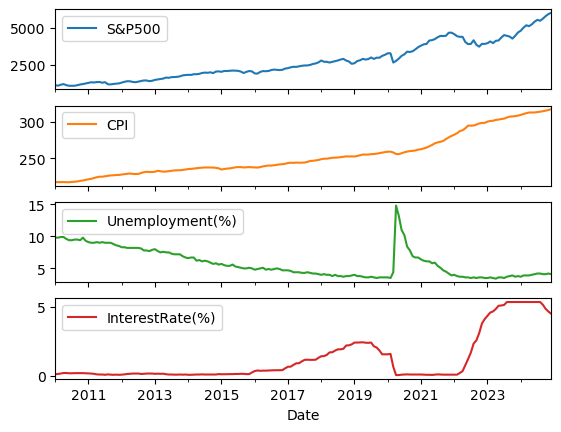

In [15]:
monthly_data.plot(x='Date',subplots=True)

In [16]:
monthly_data.corr()

,Date,S&P500,CPI,Unemployment(%),InterestRate(%)
Date,1.000000,0.960387,0.943079,-0.689752,0.706948
S&P500,0.960387,1.000000,0.959830,-0.615450,0.708292
CPI,0.943079,0.959830,1.000000,-0.622783,0.823104
Unemployment(%),-0.689752,-0.615450,-0.622783,1.000000,-0.570476
InterestRate(%),0.706948,0.708292,0.823104,-0.570476,1.000000


In [17]:
monthly_data_test=monthly_data[(monthly_data['Date']>='2010-01-01') & (monthly_data['Date']<='2020-12-31')]
monthly_data_test
monthly_data_test.corr()

,Date,S&P500,CPI,Unemployment(%),InterestRate(%)
Date,1.000000,0.980630,0.988750,-0.611682,0.628460
S&P500,0.980630,1.000000,0.978472,-0.583718,0.618330
CPI,0.988750,0.978472,1.000000,-0.596728,0.639861
Unemployment(%),-0.611682,-0.583718,-0.596728,1.000000,-0.684627
InterestRate(%),0.628460,0.618330,0.639861,-0.684627,1.000000


In [18]:
monthly_data_test2=monthly_data[(monthly_data['Date']>='2021-01-01') & (monthly_data['Date']<='2024-12-31')]
monthly_data_test2
monthly_data_test2.corr()

,Date,S&P500,CPI,Unemployment(%),InterestRate(%)
Date,1.000000,0.721746,0.974810,-0.572319,0.912340
S&P500,0.721746,1.000000,0.582696,-0.101456,0.441153
CPI,0.974810,0.582696,1.000000,-0.724048,0.920503
Unemployment(%),-0.572319,-0.101456,-0.724048,1.000000,-0.561978
InterestRate(%),0.912340,0.441153,0.920503,-0.561978,1.000000


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

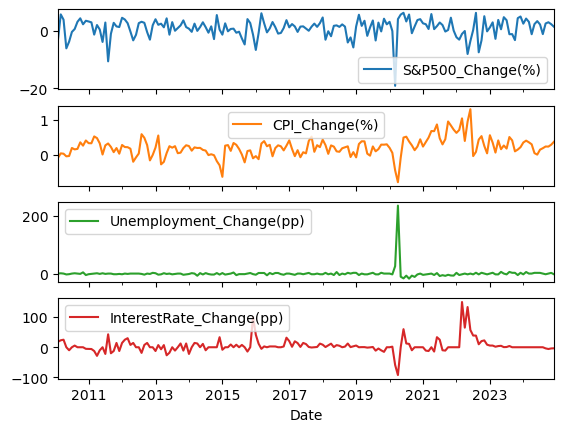

In [19]:
monthly_data_changes.plot(x='Date',subplots=True)

In [20]:
monthly_data_changes.corr()

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.038505,0.291447,0.041726,0.101762
S&P500_Change(%),0.038505,1.000000,0.105330,-0.000562,-0.103267
CPI_Change(%),0.291447,0.105330,1.000000,-0.320585,0.333596
Unemployment_Change(pp),0.041726,-0.000562,-0.320585,1.000000,-0.347929
InterestRate_Change(pp),0.101762,-0.103267,0.333596,-0.347929,1.000000


In [21]:
monthly_data_test=monthly_data_changes[(monthly_data_changes['Date']>='2010-01-01') & (monthly_data_changes['Date']<='2020-12-31')]
monthly_data_test
monthly_data_test.corr()

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.035266,-0.002164,0.105342,-0.034375
S&P500_Change(%),0.035266,1.000000,0.325144,-0.002959,0.037674
CPI_Change(%),-0.002164,0.325144,1.000000,-0.418228,0.161119
Unemployment_Change(pp),0.105342,-0.002959,-0.418228,1.000000,-0.503531
InterestRate_Change(pp),-0.034375,0.037674,0.161119,-0.503531,1.000000


In [22]:
monthly_data_test2=monthly_data_changes[(monthly_data_changes['Date']>='2021-01-01') & (monthly_data_changes['Date']<='2024-12-31')]
monthly_data_test2
monthly_data_test2.corr()

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.128490,-0.506437,0.484158,-0.193617
S&P500_Change(%),0.128490,1.000000,-0.343549,0.050637,-0.361726
CPI_Change(%),-0.506437,-0.343549,1.000000,-0.231330,0.444688
Unemployment_Change(pp),0.484158,0.050637,-0.231330,1.000000,-0.008690
InterestRate_Change(pp),-0.193617,-0.361726,0.444688,-0.008690,1.000000


In [23]:
#scatterplot for correlation raw and % change
#line chart for % change

In [24]:
#post recession- 2010-2014
#pre-pandemic - 2015-2019
#pandemic- 2020-2021
#post panedmic 2022-2024
#are there any trends or correlation to be found here?

#Which time periods had the lowest/greatest average CPI % changes,unemployment rate % changes, and interest rate % changes?

In [25]:
monthly_data_changes_post_recession=monthly_data_changes[(monthly_data_changes['Date']>='2010-01-01') & (monthly_data_changes['Date']<='2014-12-31')]
monthly_data_changes_post_recession
monthly_data_changes_post_recession.corr()

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.096711,-0.223083,-0.195740,-0.012966
S&P500_Change(%),0.096711,1.000000,0.197834,-0.012392,-0.166162
CPI_Change(%),-0.223083,0.197834,1.000000,-0.114073,-0.217230
Unemployment_Change(pp),-0.195740,-0.012392,-0.114073,1.000000,-0.047884
InterestRate_Change(pp),-0.012966,-0.166162,-0.217230,-0.047884,1.000000


In [26]:
monthly_data_changes_pre_pandemic=monthly_data_changes[(monthly_data_changes['Date']>='2015-01-01') & (monthly_data_changes['Date']<='2019-12-31')]
monthly_data_changes_pre_pandemic
monthly_data_changes_pre_pandemic.corr()

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.125242,0.212444,0.051041,-0.226743
S&P500_Change(%),0.125242,1.000000,0.376252,-0.039916,-0.223707
CPI_Change(%),0.212444,0.376252,1.000000,0.011437,-0.170914
Unemployment_Change(pp),0.051041,-0.039916,0.011437,1.000000,-0.128837
InterestRate_Change(pp),-0.226743,-0.223707,-0.170914,-0.128837,1.000000


In [27]:
monthly_data_changes_pandemic=monthly_data_changes[(monthly_data_changes['Date']>='2020-01-01') & (monthly_data_changes['Date']<='2021-12-31')]
monthly_data_changes_pandemic
monthly_data_changes_pandemic.corr()

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.124261,0.717375,-0.276339,0.200121
S&P500_Change(%),0.124261,1.000000,0.320621,-0.027040,0.452167
CPI_Change(%),0.717375,0.320621,1.000000,-0.647874,0.686739
Unemployment_Change(pp),-0.276339,-0.027040,-0.647874,1.000000,-0.745696
InterestRate_Change(pp),0.200121,0.452167,0.686739,-0.745696,1.000000


In [28]:
monthly_data_changes_post_pandemic=monthly_data_changes[(monthly_data_changes['Date']>='2022-01-01') & (monthly_data_changes['Date']<='2024-12-31')]
monthly_data_changes_post_pandemic
monthly_data_changes_post_pandemic.corr()

,Date,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
Date,1.000000,0.433088,-0.488291,0.203425,-0.574965
S&P500_Change(%),0.433088,1.000000,-0.499639,0.174807,-0.379314
CPI_Change(%),-0.488291,-0.499639,1.000000,-0.126360,0.600986
Unemployment_Change(pp),0.203425,0.174807,-0.126360,1.000000,-0.217160
InterestRate_Change(pp),-0.574965,-0.379314,0.600986,-0.217160,1.000000


In [29]:
import numpy as np

In [30]:
df = monthly_data_changes.copy()

df['SYN_S&P']   = 100 * (1 + df['S&P500_Change(%)']/100).cumprod()
df['RollingPeak'] = df['SYN_S&P'].cummax()
df['Drawdown(%)'] = (df['SYN_S&P'] - df['RollingPeak']) / df['RollingPeak'] * 100

phase, in_bear, bear_peak = [], False, None
for price, peak, dd in zip(df['SYN_S&P'], df['RollingPeak'], df['Drawdown(%)']):
    if not in_bear and dd <= -20:
        in_bear, bear_peak = True, peak
    elif in_bear and price >= bear_peak:
        in_bear, bear_peak = False, None
    phase.append('Bear' if in_bear else 'Bull')
df['MarketPhase'] = phase

cols = ['S&P500_Change(%)','CPI_Change(%)','Unemployment_Change(pp)','InterestRate_Change(pp)']
print(df.groupby('MarketPhase')[cols].mean().round(3))

target = 'S&P500_Change(%)'
inds   = ['CPI_Change(%)','Unemployment_Change(pp)','InterestRate_Change(pp)']

bear_sp = df.loc[df.MarketPhase=='Bear', [target]+inds].corr().loc[target, inds]
bull_sp = df.loc[df.MarketPhase=='Bull', [target]+inds].corr().loc[target, inds]

corr_compare = pd.DataFrame({'Bear': bear_sp.round(3), 'Bull': bull_sp.round(3)})
print("\nCorrelation with S&P500 (Bear vs Bull):\n", corr_compare)

             S&P500_Change(%)  CPI_Change(%)  Unemployment_Change(pp)  \
MarketPhase                                                             
Bear                    1.099          0.276                    0.452   
Bull                    0.988          0.207                    0.222   

             InterestRate_Change(pp)  
MarketPhase                           
Bear                           5.595  
Bull                           4.745  

Correlation with S&P500 (Bear vs Bull):
                           Bear   Bull
CPI_Change(%)           -0.040  0.112
Unemployment_Change(pp) -0.425  0.005
InterestRate_Change(pp)  0.003 -0.107


In [31]:
print(df['MarketPhase'].value_counts())

MarketPhase
Bull    165
Bear     14
Name: count, dtype: int64


In [32]:
df[df['MarketPhase'] == 'Bull'][['S&P500_Change(%)','CPI_Change(%)','Unemployment_Change(pp)','InterestRate_Change(pp)']].corr()

,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
S&P500_Change(%),1.000000,0.112321,0.005099,-0.107344
CPI_Change(%),0.112321,1.000000,-0.331306,0.336389
Unemployment_Change(pp),0.005099,-0.331306,1.000000,-0.350343
InterestRate_Change(pp),-0.107344,0.336389,-0.350343,1.000000


In [33]:
df[df['MarketPhase'] == 'Bear'][['S&P500_Change(%)','CPI_Change(%)','Unemployment_Change(pp)','InterestRate_Change(pp)']].corr()

,S&P500_Change(%),CPI_Change(%),Unemployment_Change(pp),InterestRate_Change(pp)
S&P500_Change(%),1.000000,-0.039993,-0.425066,0.002644
CPI_Change(%),-0.039993,1.000000,0.404168,0.269142
Unemployment_Change(pp),-0.425066,0.404168,1.000000,0.149619
InterestRate_Change(pp),0.002644,0.269142,0.149619,1.000000


In [36]:
#other countries, global economy vs us economy
tickers = ["^GSPC", "XLK", "XLV", "XLF", "XLE"]

data = yf.download(tickers, start=start, end=end, group_by='ticker')

monthly_data = {}
for ticker in tickers:
    monthly_data[ticker] = data[ticker]['Close'].resample('MS').mean()

monthly_df = pd.DataFrame(monthly_data)

monthly_df.rename(columns={
    "^GSPC": "S&P500",
    "XLK": "Technology",
    "XLV": "Healthcare",
    "XLF": "Financials",
    "XLE": "Energy"
}, inplace=True)

monthly_df

C:\Users\Andrew\AppData\Local\Temp\ipykernel_20216\2385858280.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start=start, end=end, group_by='ticker')
[*********************100%***********************]  5 of 5 completed


,S&P500,Technology,Healthcare,Financials,Energy
Date,,,,,
2010-01-01,1123.581582,18.203107,24.497269,9.108148,35.065618
2010-02-01,1089.159989,17.354141,24.006556,8.775492,33.583456
2010-03-01,1152.048690,18.406722,24.666950,9.590396,34.669046
2010-04-01,1197.316185,19.213259,24.404024,10.188231,36.243687
2010-05-01,1125.062006,18.032465,22.953138,9.409370,33.420232
...,...,...,...,...,...
2024-08-01,5478.214577,213.076669,149.850553,42.728505,86.663059
2024-09-01,5621.260449,216.544881,152.608849,44.403516,84.542664
2024-10-01,5792.319548,227.260464,149.391657,45.935695,88.457452


In [ ]:
#0 Intro
#1 Make dataframe of the stocks(S&P 500 and different sectors) closing and economic key indicators numbers
#2 Make dataframe of the stock changes % and economic key indicators numbers
#3 Make line plots and scatter plots
#4 Show correlation numbers
#5 Do the same as #1-4 but for specific time periods
#6 Do bull vs bear time periods as well
#7 Conclusion